Inainte sa trimiti notebook-ul:

* asigura-te ca totul se executa cum trebuie. Prima oara, **restarteaza kernel-ul** (in meniu, selecteaza Kernel$\rightarrow$Restart & Run all);

* nu lasa niciun mesaj la output (`disp`, `printf`, linii care nu sunt incheiate cu `;`) in functiile pe care le scrii decat daca ti se specifica explicit sa faci acest lucru! Orice abatere va fi **depunctata automat** de grader;

* citeste instructiunile de [aici](https://github.com/radusqrt/numerical-methods/blob/master/lab_instructions.md) cu atentie;

* asigura-te ca rezolvi toate celulele in care scrie `YOUR CODE HERE` sau `YOUR ANSWER HERE` si ca iti treci numele mai jos:

In [1]:
STUDENT_NAME = "Babian Stelian Alexandru";

---

# Laborator 11-12: Integrare numerică
### Autor: Radu Stochitoiu

## Functii ajutatoare

In [3]:
function plot_trapezoidal(f, a, b, n)
    hold;
    xx = linspace(a, b);
    h = (b - a) / n;
    plot(xx, f(xx), 'b');
    for x = a:h:b-h
        plot([x, x+h], [f(x), f(x+h)], 'r');
    endfor
    plot([a:h:b], f([a:h:b]), 'o', 'markersize', 10);
endfunction

function plot_simpson(f, a, b, n)
    hold;
    xx = linspace(a, b);
    h = (b - a) / (2*n);
    plot(xx, f(xx), 'b');
    for x = a:2*h:b-h
        L = polyfit([x, x+h, x+2*h], [f(x), f(x+h), f(x+2*h)], 2);
        xx = linspace(x, x+2*h);
        yy = polyval(L, xx);
        plot(xx, yy, 'r');
    endfor
    plot([a:h:b], f([a:h:b]), 'o', 'markersize', 10);
endfunction

## Problema 1

Implementati funcția ```trapezoidal(f, a, b, n)``` ce primește un handle la o funcție $f$, un interval, $[a, b]$, un număr de subintervale, $n$, și returnează valoarea integralei numerice aproximate cu regula trapezelor.

In [14]:
function [T] = trapezoidal(f, a, b, n)
    suma=0;
    inaltime=(b-a)/n;
    y=zeros(n-1,1);
    x=zeros(n-1,1);
    %x(1:n-1)=a+1:(n-1)*inaltime
    %y(1:n-1)=f(x(1:n-1))
    for i=1:n-1
    x(i)=a+i*inaltime;
    y(i)=f(x(i));
    endfor
    suma=sum(y);
    T=inaltime/2*(f(a)+f(b)+2*suma);
endfunction

In [16]:
function [y]= f(x)
    y=x^2;
endfunction
res=trapezoidal(@f,1,2,4)

res =  2.3438


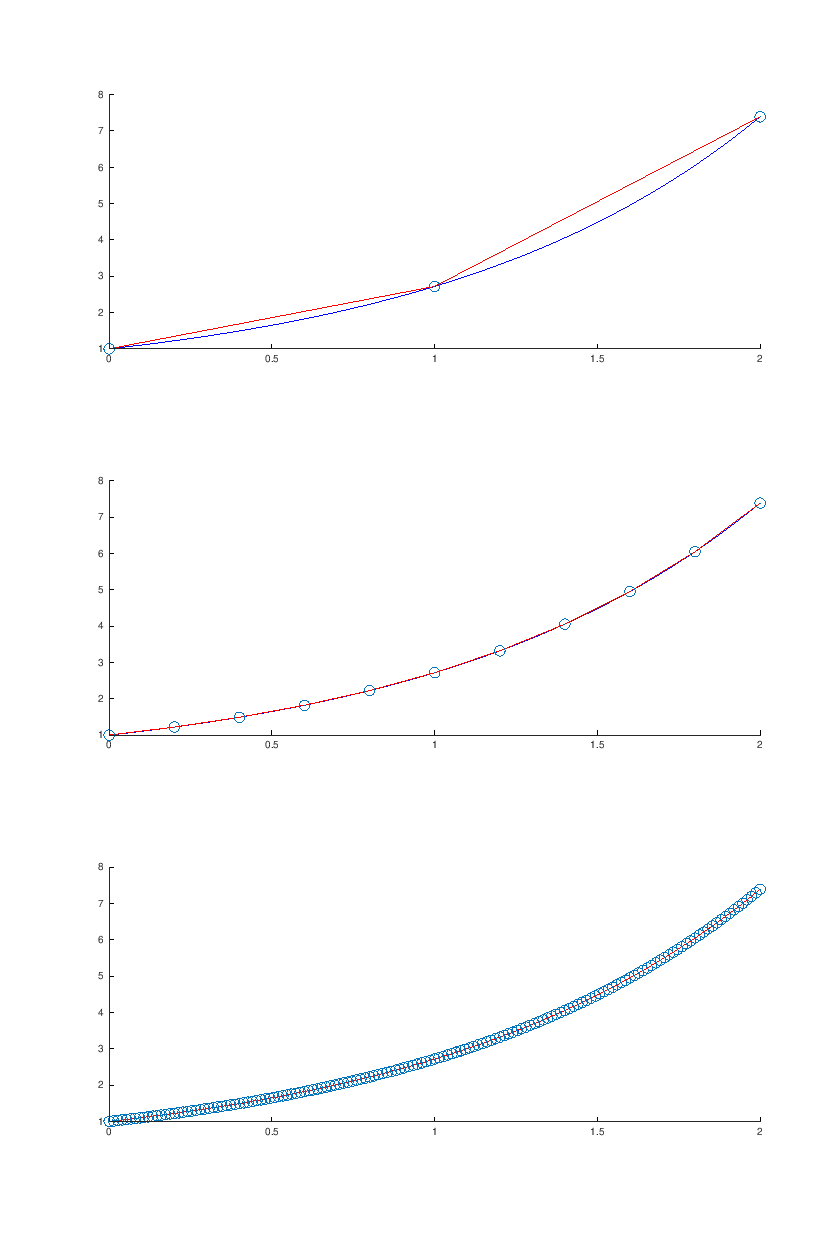

In [4]:
function [y] = f(x)
    y = exp(x);
endfunction

res = trapezoidal(@f, 0, 2, 2);
assert(norm(res - 6.9128) < 1e-4);
subplot(3, 1, 1);
plot_trapezoidal(@f, 0, 2, 2);

res = trapezoidal(@f, 0, 2, 10);
assert(norm(res - 6.4103) < 1e-4);
subplot(3, 1, 2);
plot_trapezoidal(@f, 0, 2, 10);

res = trapezoidal(@f, 0, 2, 150);
assert(norm(res - 6.3892) < 1e-4);
subplot(3, 1, 3);
plot_trapezoidal(@f, 0, 2, 150);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 2

Implementati funcția ```simpson(f, a, b, n)``` ce primește un handle la o funcție $f$, un interval, $[a, b]$, un număr $n$ (vor fi $2n$ subintervale), și returnează valoarea integralei numerice aproximate cu regula Simpson.

In [4]:
function [S] = simpson(f, a, b, n)
    S=f(a);
    inaltime=(b-a)/(2*n);
    p=0;
    q=0; 
    for i=1:n-1
        a=a+inaltime;
        S=S+4*f(a);
        a=a+inaltime;
        S=S+2*f(a);
    endfor
    a=a+inaltime;
    S=S+4*f(a)+f(b);
    S=inaltime/3*S;
endfunction

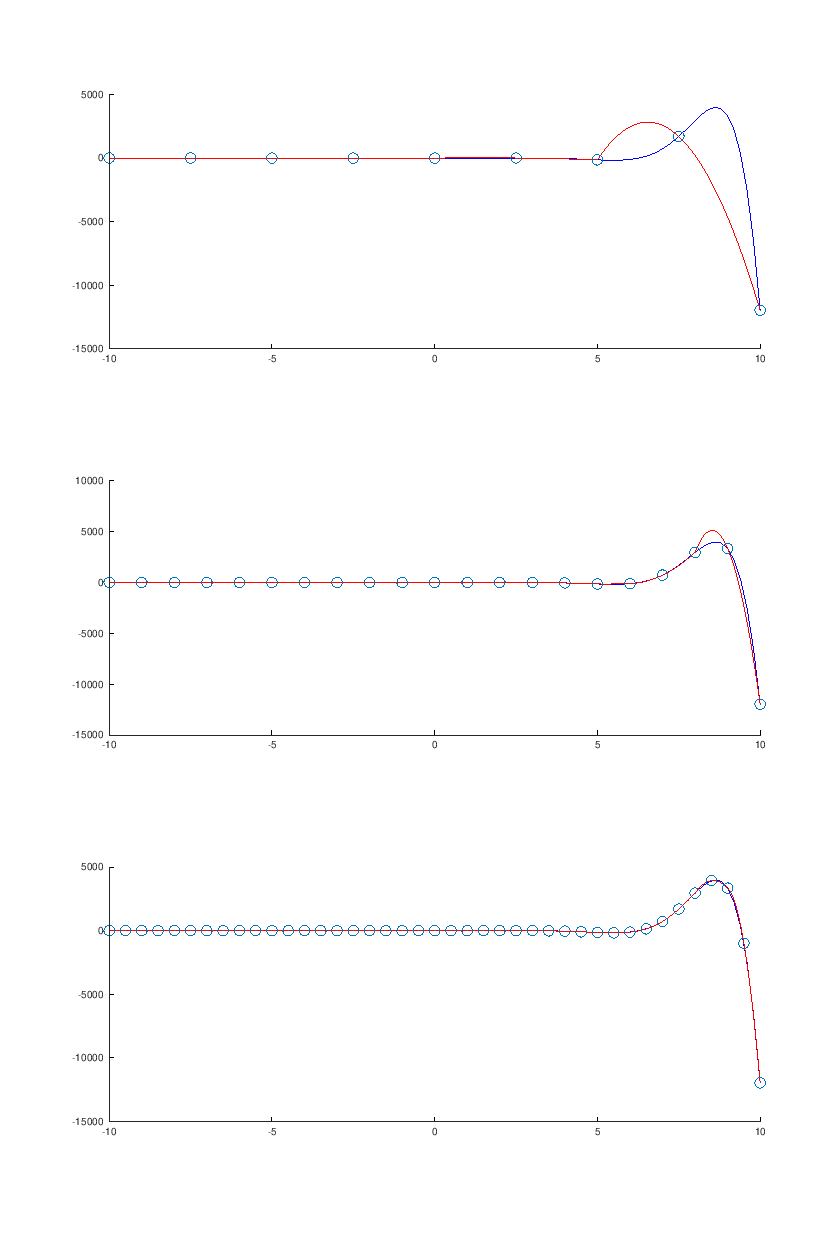

In [5]:
function [y] = f(x)
    y = exp(x) .* sin(x) + sqrt(x.^2 + 1);
endfunction

res = simpson(@f, -10, 10, 4);
assert(norm(res - (-4441.813339)) < 1e-4);
subplot(3, 1, 1);
plot_simpson(@f, -10, 10, 4);

res = simpson(@f, -10, 10, 10);
assert(norm(res - 3206.95473) < 1e-4);
subplot(3, 1, 2);
plot_simpson(@f, -10, 10, 10);

res = simpson(@f, -10, 10, 20);
assert(norm(res - 3.347201142e+03) < 1e-4);
subplot(3, 1, 3);
plot_simpson(@f, -10, 10, 20);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 3

Implementati funcția ```romberg(f, a, b, n)``` ce primește un handle la o funcție $f$, un interval, $[a, b]$, un număr $n$ și returnează valoarea integralei numerice aproximate cu Romberg ($R(n, n)$).

In [12]:
function [R] = romberg(f, a, b, n)
   prev_R=zeros(n+1,1);
   for i=1:n+1
   prev_R(i)=trapezoidal(f,a,b,2^(i-1))
   endfor
   R=prev_R;
   for i=1:n
   R=zeros(length(prev_R)-1,1);
   for j=2:length(prev_R);
   R(j-1)=prev_R(j)+(prev_R(j)-prev_R(j-1))/(2^(2*i)-1);
   endfor
   prev_R=R;
   endfor
endfunction

In [13]:
function [y] = f(x)
    y=x^2;
endfunction
res = romberg(@f, 1, 2, 3)

prev_R =

   2.50000
   0.00000
   0.00000
   0.00000

prev_R =

   2.50000
   2.37500
   0.00000
   0.00000

prev_R =

   2.50000
   2.37500
   2.34375
   0.00000

prev_R =

   2.5000
   2.3750
   2.3438
   2.3359

res =  2.3333


In [11]:
function [y] = f(x)
    y = sin(x) .* (x.^2 + exp(x)) .^ (0.7);
endfunction

res = romberg(@f, -20, 20, 2);
assert(norm(res - 3.407222054e+06) < 1e-3);

res = romberg(@f, -20, 20, 5);
assert(norm(res - 1.613822232e+05) < 1e-3);

res = romberg(@f, -20, 20, 7);
assert(norm(res - 1.864509845e+05) < 1e-3);